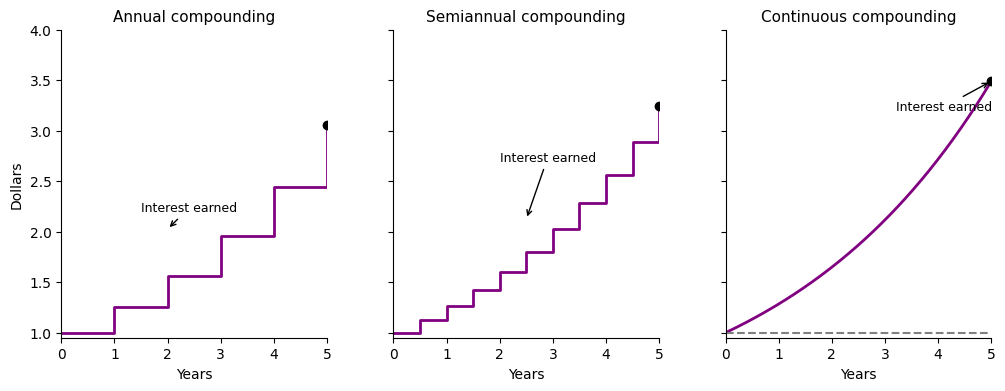

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
principal = 1.0
r = 0.25     # 25% interest rate (just an example)
T = 5        # total years
ymin, ymax = 0.95, 4.0  # y-limits to show growth from near 1 up to ~4

# -----------------------------
# Figure and subplots
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.25)

# Remove top/right spines for a cleaner look
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Common y-axis label
axes[0].set_ylabel("Dollars", fontsize=10)

# =============================
# 1) Annual Compounding
# =============================
ax1 = axes[0]
ax1.set_title("Annual compounding", fontsize=11)

# Times from 0..5 (integer steps)
x_annual = np.arange(0, T+1)  # [0, 1, 2, 3, 4, 5]
# Balance at each integer year
y_annual = principal * (1 + r) ** x_annual

# Step plot: interest is credited at the end of each year
ax1.step(x_annual, y_annual, where='post', color='purple', linewidth=2)
ax1.set_ylim(ymin, ymax)
ax1.set_xlim(0, T)

# Final dot at year 5
ax1.plot(T, y_annual[-1], 'ko', markersize=6)

# Annotate "Interest earned" arrow
ax1.annotate(
    "Interest earned",
    xy=(2, principal + (y_annual[-1] - principal)/2),
    xytext=(1.5, 2.2),
    arrowprops=dict(arrowstyle="->", color='black'),
    fontsize=9
)

ax1.set_xlabel("Years", fontsize=10)

# =============================
# 2) Semiannual Compounding
# =============================
ax2 = axes[1]
ax2.set_title("Semiannual compounding", fontsize=11)

# Times from 0..5 in increments of 0.5
x_semi = np.arange(0, T+0.5, 0.5)  # [0,0.5,1.0,1.5,2.0,...,5.0]
# Each half-year applies interest r/2, so total compounding is (1 + r/2)^(2t)
y_semi = principal * (1 + r/2) ** (2 * x_semi)

ax2.step(x_semi, y_semi, where='post', color='purple', linewidth=2)
ax2.set_ylim(ymin, ymax)
ax2.set_xlim(0, T)

# Final dot at year 5
A_semi = principal * (1 + r/2) ** (2 * T)
ax2.plot(T, A_semi, 'ko', markersize=6)

# "Interest earned" annotation
ax2.annotate(
    "Interest earned",
    xy=(2.5, principal + (A_semi - principal)/2),
    xytext=(2.0, 2.7),
    arrowprops=dict(arrowstyle="->", color='black'),
    fontsize=9
)

ax2.set_xlabel("Years", fontsize=10)

# =============================
# 3) Continuous Compounding
# =============================
ax3 = axes[2]
ax3.set_title("Continuous compounding", fontsize=11)

# For a smooth exponential curve
t_values = np.linspace(0, T, 300)
y_cont = principal * np.exp(r * t_values)
ax3.plot(t_values, y_cont, color='purple', linewidth=2)
ax3.set_ylim(ymin, ymax)
ax3.set_xlim(0, T)

# Final dot
A_cont = principal * np.exp(r * T)
ax3.plot(T, A_cont, 'ko', markersize=6)

# Dashed line at principal=1 to illustrate the gain
ax3.hlines(principal, 0, T, linestyles='dashed', color='gray')

# Annotation for interest
ax3.annotate(
    "Interest earned",
    xy=(T, A_cont),
    xytext=(3.2, 3.2),
    arrowprops=dict(arrowstyle="->", color='black'),
    fontsize=9
)

ax3.set_xlabel("Years", fontsize=10)

plt.show()
